### House Price Predection :

In [1065]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [1066]:
data=pd.read_csv("House Price Prediction Dataset.csv")

Some information about the data :

In [1067]:
data

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [1068]:
data.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [1069]:
data.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [1070]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [1071]:
data.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

Our dataset is cleaned and ready for prediction.

Part: Encoding categorical variables :

In [1072]:
data= pd.get_dummies(data, columns=['Condition'])

In [1073]:
data= pd.get_dummies(data, columns=['Location'])

In [1074]:
data['Garage']=data['Garage'].astype('category')
data['Garage']=data['Garage'].cat.codes

In [1075]:
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)


In [1076]:
data

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Garage,Price,Condition_Excellent,Condition_Fair,Condition_Good,Condition_Poor,Location_Downtown,Location_Rural,Location_Suburban,Location_Urban
0,1,1360,5,4,3,1970,0,149919,1,0,0,0,1,0,0,0
1,2,4272,5,4,3,1958,0,424998,1,0,0,0,1,0,0,0
2,3,3592,2,2,3,1938,0,266746,0,0,1,0,1,0,0,0
3,4,966,4,2,2,1902,1,244020,0,1,0,0,0,0,1,0
4,5,4926,1,4,2,1975,1,636056,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,0,295620,0,0,0,1,0,0,1,0
1996,1997,3046,5,2,1,2019,1,580929,0,0,0,1,0,0,1,0
1997,1998,1062,5,1,2,1903,0,476925,0,0,0,1,0,1,0,0
1998,1999,4062,3,1,2,1936,1,161119,1,0,0,0,0,0,0,1


Prediction phase :

Now we are going to predict the house price based on the following features: Area, Bedrooms, Bathrooms, Floors, Year Built, Location, Condition, and Garage.

So we need to create one variable that contains all these features and another variable that contains the corresponding price for each entry :

In [1077]:
#variable that contains all the features
X=data.drop(['Id','Price'],axis=1)

In [1078]:
X

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Garage,Condition_Excellent,Condition_Fair,Condition_Good,Condition_Poor,Location_Downtown,Location_Rural,Location_Suburban,Location_Urban
0,1360,5,4,3,1970,0,1,0,0,0,1,0,0,0
1,4272,5,4,3,1958,0,1,0,0,0,1,0,0,0
2,3592,2,2,3,1938,0,0,0,1,0,1,0,0,0
3,966,4,2,2,1902,1,0,1,0,0,0,0,1,0
4,4926,1,4,2,1975,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,0,0,0,0,1,0,0,1,0
1996,3046,5,2,1,2019,1,0,0,0,1,0,0,1,0
1997,1062,5,1,2,1903,0,0,0,0,1,0,1,0,0
1998,4062,3,1,2,1936,1,1,0,0,0,0,0,0,1


In [1079]:
#variable that contains the corresponding price for each entry
Y=data['Price']

In [1080]:
Y

0       149919
1       424998
2       266746
3       244020
4       636056
         ...  
1995    295620
1996    580929
1997    476925
1998    161119
1999    482525
Name: Price, Length: 2000, dtype: int64

Now we should split our data into 80% for training and 20% for testing. For this, we will use the function below :

In [1081]:
Y.describe()

count      2000.000000
mean     537676.855000
std      276428.845719
min       50005.000000
25%      300098.000000
50%      539254.000000
75%      780086.000000
max      999656.000000
Name: Price, dtype: float64

In [1082]:
from sklearn.model_selection import train_test_split

In [1083]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [1084]:
upper_limit = Y.quantile(0.99)  # remove top 1%
mask = Y < upper_limit
X = X.loc[mask]
Y = Y.loc[mask]


Building our model :

In [1085]:
#import linear regression model :
from sklearn.linear_model import LinearRegression

#create the model
model = LinearRegression()

#Train the model using our dataset for tarining
model.fit(X_train,Y_train)

LinearRegression()

Now with the model trained, we can now test it and check the prediction accuracy

In [1086]:
#Trying to predict on our test data.

Y_pred= model.predict(X_test)

In [1087]:
Y_pred

array([521988.22189839, 549119.31196651, 487101.22235594, 539752.7439933 ,
       553242.24872512, 521375.92025826, 523320.18080583, 578133.64353335,
       545899.64738458, 577368.69940644, 549359.90237922, 583802.8656311 ,
       511024.20843161, 527181.17287186, 502178.93122353, 563657.42139779,
       533851.47058016, 557566.45545641, 578893.4890812 , 522197.01288502,
       535945.37429884, 520333.81440515, 520145.76012635, 589984.6964629 ,
       570910.91251258, 530657.68307139, 524849.79926253, 533833.03412407,
       517535.08657939, 489462.64631857, 471135.44970754, 532885.36922583,
       559703.53345149, 566918.76753933, 505186.85760171, 504126.65238569,
       566525.93875815, 587039.42913431, 533334.54147469, 503067.97932305,
       488794.10065586, 540580.91705316, 538165.7543287 , 538208.1073811 ,
       539782.8193264 , 574195.17961934, 551957.63060142, 537147.22385255,
       531554.19942009, 528480.27403638, 515181.27688738, 549393.77262824,
       567112.62323004, 5

In [1088]:
from sklearn.metrics import r2_score

In [1089]:
model.score(X_test,Y_test)

-0.006717808430749761

In [1090]:
r2_score(Y_test,Y_pred )

-0.006717808430749761

Now with the model trained, we can now test it and check the prediction accuracy

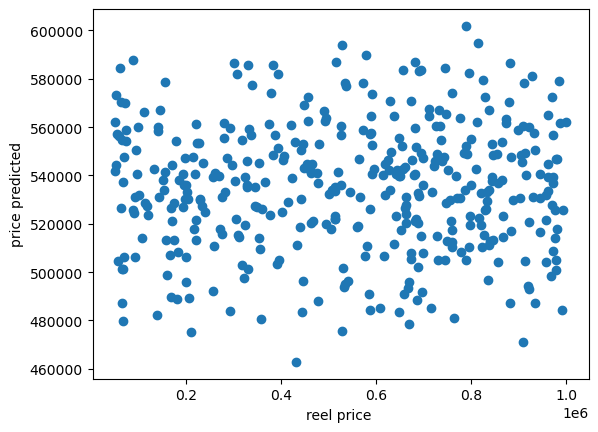

In [1091]:
plt.scatter(Y_test,Y_pred)
plt.xlabel("reel price ")
plt.ylabel("price predicted")
plt.show()